In [1]:
import skimage.data
img = skimage.data.chelsea()
img = skimage.color.rgb2gray(img)

In [26]:
import numpy
ll_filter = numpy.zeros((2,3,3))

In [27]:
ll_filter[0,:,:] = numpy.array([[[-1,0,1],
                             [-1,0,1],
                            [-1,0,1]]])
ll_filter[1,:,:] = numpy.array([[[1,1,1],
                             [0,0,0],
                            [-1,-1,-1]]])


# convolution layer

In [37]:
def conv(img, conv_filter):
    if len(img.shape) >2 or len(conv_filter.shape) >3:
        if img.shape[-1] !=conv_filter.shape[-1]:
            print("error : no of channels in both images must match")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]:
        print('error: must be square')
        sys.exit()
    if conv_filter.shape[1]%2 ==0:
        print('error:size must be odd')
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :]
        
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                      curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps

In [44]:
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    
    for r in numpy.uint16(numpy.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in numpy.uint16(numpy.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), 
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result

In [45]:
ll_feature_map = conv(img, ll_filter)

Filter  1
Filter  2


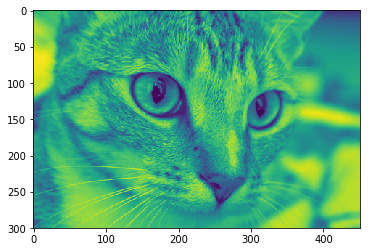

In [52]:
import matplotlib.pyplot as py
py.imshow(img)